<a href="https://colab.research.google.com/github/brayla-oya/DDDS-My-Projects/blob/main/Project__3_SQL_1_Chinook_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [ ]:
# Install the sqlite package for Ubuntu
# Download the Chinook sqlite database


## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



In [ ]:
import sqlite3 as db
import pandas as pd


In [ ]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [ ]:
# demonstrates that you have sqlite
!sqlite3 --help

Usage: sqlite3 [OPTIONS] FILENAME [SQL]
FILENAME is the name of an SQLite database. A new database is created
if the file does not previously exist.
OPTIONS include:
   -A ARGS...           run ".archive ARGS" and exit
   -append              append the database to the end of the file
   -ascii               set output mode to 'ascii'
   -bail                stop after hitting an error
   -batch               force batch I/O
   -box                 set output mode to 'box'
   -column              set output mode to 'column'
   -cmd COMMAND         run "COMMAND" before reading stdin
   -csv                 set output mode to 'csv'
   -deserialize         open the database using sqlite3_deserialize()
   -echo                print commands before execution
   -init FILENAME       read/process named file
   -[no]header          turn headers on or off
   -help                show this message
   -html                set output mode to HTML
   -interactive         force interactive I/O
   -j

In [ ]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip

Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [ ]:
!rm -f chinook.db

In [ ]:
!unzip -u chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


In [ ]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Jun 30 16:48 .
drwxr-xr-x 1 root root   4096 Jun 30 16:46 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Jun 30 16:48 chinook.zip
drwxr-xr-x 4 root root   4096 Jun 26 13:34 .config
drwxr-xr-x 1 root root   4096 Jun 26 13:35 sample_data


In [ ]:
# Get a list of the tables in the database
%%script sqlite3 --column --header chinook.db
.tables

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


### Basic Queries


In [ ]:
# Connect to a sqlite database and load a result set into a data frame
db_con = db.connect("chinook.db")


#### SELECT (with * and with column names)


In [ ]:
# Select the first 10 entries from the employees table
query = '''
  SELECT *
  FROM employees
  LIMIT 10
'''

with db.connect("chinook.db") as db_con:
  employees = pd.read_sql_query( query , db_con)
employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [ ]:
# SELECT first 10 entries from invoices table
query = '''
  SELECT *
  FROM invoices
  LIMIT 10
  '''

with db.connect("chinook.db") as db_con:
  invoices = pd.read_sql_query( query , db_con)
invoices

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
5,6,37,2009-01-19 00:00:00,Berger Straße 10,Frankfurt,None,Germany,60316,0.99
6,7,38,2009-02-01 00:00:00,Barbarossastraße 19,Berlin,None,Germany,10779,1.98
7,8,40,2009-02-01 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
8,9,42,2009-02-02 00:00:00,"9, Place Louis Barthou",Bordeaux,None,France,33000,3.96
9,10,46,2009-02-03 00:00:00,3 Chatham Street,Dublin,Dublin,Ireland,None,5.94


In [ ]:
# SELECT first 10 entries from customers table
query = '''
  SELECT *
  FROM customers
  LIMIT 10
  '''

with db.connect("chinook.db") as db_con:
  customers = pd.read_sql_query( query , db_con)
customers

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


In [ ]:
# Select the first 10 entries from the albums table
query = '''
  SELECT *
  FROM artists
  LIMIT 10
'''

with db.connect("chinook.db") as db_con:
  artists = pd.read_sql_query( query , db_con)
artists

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
5,6,Antônio Carlos Jobim
6,7,Apocalyptica
7,8,Audioslave
8,9,BackBeat
9,10,Billy Cobham


In [ ]:
# Select the first 10 entries from the albums table
query = '''
SELECT *
FROM artists
JOIN albums
on artists.ArtistID = albums.ArtistID
WHERE Name = 'Black Sabbath'
LIMIT 10
'''

with db.connect("chinook.db") as db_con:
  artists = pd.read_sql_query( query , db_con)
artists

,ArtistId,Name,AlbumId,Title,ArtistId
0,12,Black Sabbath,16,Black Sabbath,12
1,12,Black Sabbath,17,Black Sabbath Vol. 4 (Remaster),12


#### WHERE


In [ ]:
# use WHERE in Query
query = '''
  SELECT customerid, firstname, lastname, country
  FROM customers
  WHERE country = 'Brazil'
  LIMIT 10
'''

with db.connect("chinook.db") as db_con:
  customers = pd.read_sql_query( query , db_con)
customers

,CustomerId,FirstName,LastName,Country
0,1,Luís,Gonçalves,Brazil
1,10,Eduardo,Martins,Brazil
2,11,Alexandre,Rocha,Brazil
3,12,Roberto,Almeida,Brazil
4,13,Fernanda,Ramos,Brazil


In [ ]:
# How may customers are in the city of Prague?
# use WHERE in Query
query = '''
  SELECT customerid, firstname, lastname, country
  FROM customers
  WHERE city = 'Prague'
  LIMIT 10
'''

with db.connect("chinook.db") as db_con:
  customers = pd.read_sql_query( query , db_con)
customers

,CustomerId,FirstName,LastName,Country
0,5,František,Wichterlová,Czech Republic
1,6,Helena,Holý,Czech Republic


In [ ]:
# How many cutomers have a billing city of Oslo?
# use WHERE in Query
query = '''
  SELECT *
  FROM invoices
  WHERE BillingCity ='Oslo'
  '''

with db.connect("chinook.db") as db_con:
  invoices = pd.read_sql_query( query , db_con)
invoices

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
1,24,4,2009-04-06 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,5.94
2,76,4,2009-11-25 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,0.99
3,197,4,2011-05-19 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,1.98
4,208,4,2011-06-29 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,15.86
5,263,4,2012-02-27 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,8.91
6,392,4,2013-10-03 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,1.98


#### AND


In [ ]:
# List cutomers in New York state.
# use AND in Query
query = '''
  SELECT customerid, firstname, lastname, country, state
  FROM customers
  WHERE country = 'USA' and state = 'NY'
  LIMIT 10
'''

with db.connect("chinook.db") as db_con:
  customers = pd.read_sql_query( query , db_con)
customers

,CustomerId,FirstName,LastName,Country,State
0,18,Michelle,Brooks,USA,NY


#### OR


In [ ]:
# List all customers in states AZ or CA
# Use OR in Query
query = '''
  SELECT customerid, firstname, lastname, country, state
  FROM customers
  WHERE state = 'AZ' OR state = 'CA'
  LIMIT 10
'''

with db.connect("chinook.db") as db_con:
  customers = pd.read_sql_query( query , db_con)
customers

,CustomerId,FirstName,LastName,Country,State
0,16,Frank,Harris,USA,CA
1,19,Tim,Goyer,USA,CA
2,20,Dan,Miller,USA,CA
3,27,Patrick,Gray,USA,AZ


In [ ]:
# List all albums by Black Sabbath or Audioslave
# Use OR in Query
query = '''
SELECT *
FROM artists
JOIN albums
on artists.ArtistID = albums.ArtistID
WHERE Name = 'Black Sabbath' or Name = 'Audioslave'
LIMIT 10
'''

with db.connect("chinook.db") as db_con:
  artists = pd.read_sql_query( query , db_con)
artists

,ArtistId,Name,AlbumId,Title,ArtistId
0,8,Audioslave,10,Audioslave,8
1,8,Audioslave,11,Out Of Exile,8
2,12,Black Sabbath,16,Black Sabbath,12
3,12,Black Sabbath,17,Black Sabbath Vol. 4 (Remaster),12
4,8,Audioslave,271,Revelations,8


#### LIKE (with % or _ wildcard)


In [ ]:
# List albums that start with the letter N
#  Use LIKE in Query
query = '''
SELECT *
FROM Tracks
WHERE Name LIKE 'n%'
LIMIT 10
'''

with db.connect("chinook.db") as db_con:
  artists = pd.read_sql_query( query , db_con)
artists

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,13,Night Of The Long Knives,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205688,6706347,0.99
1,48,Not The Doctor,6,1,1,Alanis Morissette & Glenn Ballard,227631,7604601,0.99
2,142,No More Tears,14,1,3,None,555075,18041629,0.99
3,152,N.I.B.,16,1,3,None,368770,12029390,0.99
4,168,Now Sports,18,1,4,None,4884,161266,0.99
5,308,Na Frente Da TV,27,1,8,Bino/Da Gama/Lazao/Ras Bernardo,289750,9633659,0.99
6,313,Noite Do Prazer,28,1,7,None,311353,10309980,0.99
7,363,Nene 2001,32,1,10,None,284969,9694508,0.99
8,484,Nice Guys Finish Last,39,1,4,Billie Joe Armstrong -Words Green Day -Music,170187,5604618,0.99
9,502,Não Dá Mais Pra Segurar (Explode Coração),41,1,7,None,219768,7083012,0.99


#### BETWEEN


In [ ]:
# List all tracks that are between the sizes 160kb and 1000kb
# Use BETWEEN in Query
query = '''
SELECT *
FROM Tracks
WHERE Bytes BETWEEN 160000 and 1000000
'''

with db.connect("chinook.db") as db_con:
  artists = pd.read_sql_query( query , db_con)
artists

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,168,Now Sports,18,1,4,None,4884,161266,0.99
1,170,A Statistic,18,1,4,None,6373,211997,0.99
2,172,The Real Problem,18,1,4,None,11650,387360,0.99
3,178,Oprah,18,1,4,None,6635,224313,0.99
4,2241,Bossa,184,1,17,None,29048,967098,0.99
5,3304,Commercial 1,258,1,17,L. Muggerud,7941,319888,0.99
6,3310,Commercial 2,258,1,17,L. Muggerud,21211,850698,0.99


#### LIMIT



In [ ]:
# Use LIMIT in Query
query = '''
SELECT *
FROM Tracks
WHERE GenreId = '23'
LIMIT 10
'''

with db.connect("chinook.db") as db_con:
  artists = pd.read_sql_query( query , db_con)
artists

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,3336,War Pigs,260,4,23,None,234013,8052374,0.99
1,3365,Say Hello 2 Heaven,269,2,23,None,384497,6477217,0.99
2,3366,Reach Down,269,2,23,None,672773,11157785,0.99
3,3367,Hunger Strike,269,2,23,None,246292,4233212,0.99
4,3368,Pushin Forward Back,269,2,23,None,225278,3892066,0.99
5,3369,Call Me a Dog,269,2,23,None,304458,5177612,0.99
6,3370,Times of Trouble,269,2,23,None,342539,5795951,0.99
7,3371,Wooden Jesus,269,2,23,None,250565,4302603,0.99
8,3372,Your Savior,269,2,23,None,244226,4199626,0.99
9,3373,Four Walled World,269,2,23,None,414474,6964048,0.99


In [ ]:
# List genre IDs and names
query = '''
SELECT *
FROM genres
Name
'''

with db.connect("chinook.db") as db_con:
  artists = pd.read_sql_query( query , db_con)
artists

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


### Sorting and Grouping


#### ORDER BY


In [ ]:
# Use ORDER BY in Query
query = '''
SELECT *
FROM Albums
ORDER BY ArtistId, Title
LIMIT 15
'''

with db.connect("chinook.db") as db_con:
  artists = pd.read_sql_query( query , db_con)
artists

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,4,Let There Be Rock,1
2,2,Balls to the Wall,2
3,3,Restless and Wild,2
4,5,Big Ones,3
5,6,Jagged Little Pill,4
6,7,Facelift,5
7,34,Chill: Brazil (Disc 2),6
8,8,Warner 25 Anos,6
9,9,Plays Metallica By Four Cellos,7


In [ ]:
# ORDER 2
query = '''
SELECT *
FROM Tracks
ORDER BY TrackId
LIMIT 14
'''

with db.connect("chinook.db") as db_con:
  artists = pd.read_sql_query( query , db_con)
artists

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
5,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
6,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99
7,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
8,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99
9,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99


#### DISTINCT


In [ ]:
# Find Distinct Composers in Jazz genre
# Use DISTINCT in Query
query = '''
SELECT DISTINCT Composer
FROM Tracks
WHERE GenreId = 2
LIMIT 20
'''

with db.connect("chinook.db") as db_con:
  tracks = pd.read_sql_query( query , db_con)
tracks

,Composer
0,None
1,Billy Cobham
2,George Duke
3,Miles Davis
4,Jim Beard
5,"John Scofield, Robert Aries, Milton Chambers a..."
6,Jon Herington
7,Sylvester Stewart
8,"Dean Brown, Dennis Chambers & Jim Beard"
9,Jim Beard & Jon Herington


#### GROUP BY



In [ ]:
# Show the number of media types grouped by genre
# Use GROUP BY in Query
query = '''
SELECT COUNT(MediaTypeId), GenreId, Name
FROM Tracks
GROUP BY GenreId
'''

with db.connect("chinook.db") as db_con:
  tracks = pd.read_sql_query( query , db_con)
tracks

,COUNT(MediaTypeId),GenreId,Name
0,1297,1,For Those About To Rock (We Salute You)
1,130,2,Desafinado
2,374,3,Enter Sandman
3,332,4,Your Time Has Come
4,12,5,Money
5,81,6,First Time I Met The Blues
6,579,7,Jorge Da Capadócia
7,58,8,Girassol
8,48,9,"Dig-Dig, Lambe-Lambe (Ao Vivo)"
9,43,10,Vai-Vai 2001


### Aggregates


#### MAX


In [ ]:
# What is the max price of a track?
# Use MAX in Query
query = '''
SELECT MAX(UnitPrice)
FROM Tracks
'''

with db.connect("chinook.db") as db_con:
  tracks = pd.read_sql_query( query , db_con)
tracks

,MAX(UnitPrice)
0,1.99


#### MIN


In [ ]:
# What is the shortest track?
# Use MIN in Query
query = '''
SELECT MIN(Milliseconds)
FROM Tracks
'''

with db.connect("chinook.db") as db_con:
  tracks = pd.read_sql_query( query , db_con)
tracks

,MIN(Milliseconds)
0,1071


In [ ]:
# What is the name of the shortest track?
query = '''
SELECT
  t.Name AS TrackName,
  ar.Name AS ArtistName,
  al.Title AS AlbumTitle,
  t.Milliseconds
FROM Tracks t
JOIN Albums al ON t.AlbumId = al.AlbumId
JOIN Artists ar ON al.ArtistId = ar.ArtistId
ORDER BY t.Milliseconds ASC
LIMIT 1;
'''

with db.connect("chinook.db") as db_con:
  tracks = pd.read_sql_query( query , db_con)
tracks

,TrackName,ArtistName,AlbumTitle,Milliseconds
0,É Uma Partida De Futebol,Skank,O Samba Poconé,1071


#### SUM


In [ ]:
# What is the total sum of all the tracks?
# Use SUM in Query
query = '''
SELECT SUM(UnitPrice)
FROM Tracks
WHERE GenreId = 7
'''

with db.connect("chinook.db") as db_con:
  tracks = pd.read_sql_query( query , db_con)
tracks

,SUM(UnitPrice)
0,573.21


#### AVG


In [ ]:
# What is the average size of the tracks?
# Use AVG in Query
query = '''
SELECT AVG(Bytes)
FROM Tracks
WHERE GenreId = 12
'''

with db.connect("chinook.db") as db_con:
  tracks = pd.read_sql_query( query , db_con)
tracks

,AVG(Bytes)
0,6.160518e+06


The average size of all the tracks is about 6160 kb, which is 6MB.

#### COUNT



In [ ]:
# Use COUNT in Query
# How many media types were sold in R&B/Soul genre?
query = '''
SELECT COUNT(MediaTypeId)
FROM Tracks
WHERE GenreId = 14
'''

with db.connect("chinook.db") as db_con:
  tracks = pd.read_sql_query( query , db_con)
tracks

,COUNT(MediaTypeId)
0,61


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Which genre sold the most tracks?

query = '''
SELECT g.Name AS Genre, SUM(il.quantity) AS TracksSold
FROM invoice_items il
JOIN tracks t ON il.TrackId = t.TrackId
JOIN genres g ON t.GenreId = g.GenreId
GROUP BY g.GenreId
ORDER BY TracksSold DESC
LIMIT 5;
'''

with db.connect("chinook.db") as db_con:
  tracks = pd.read_sql_query( query , db_con)
tracks

,Genre,TracksSold
0,Rock,835
1,Latin,386
2,Metal,264
3,Alternative & Punk,244
4,Jazz,80


/tmp/ipython-input-38-1631355505.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre, x= "Revenue", y= "Genre", palette="viridis")


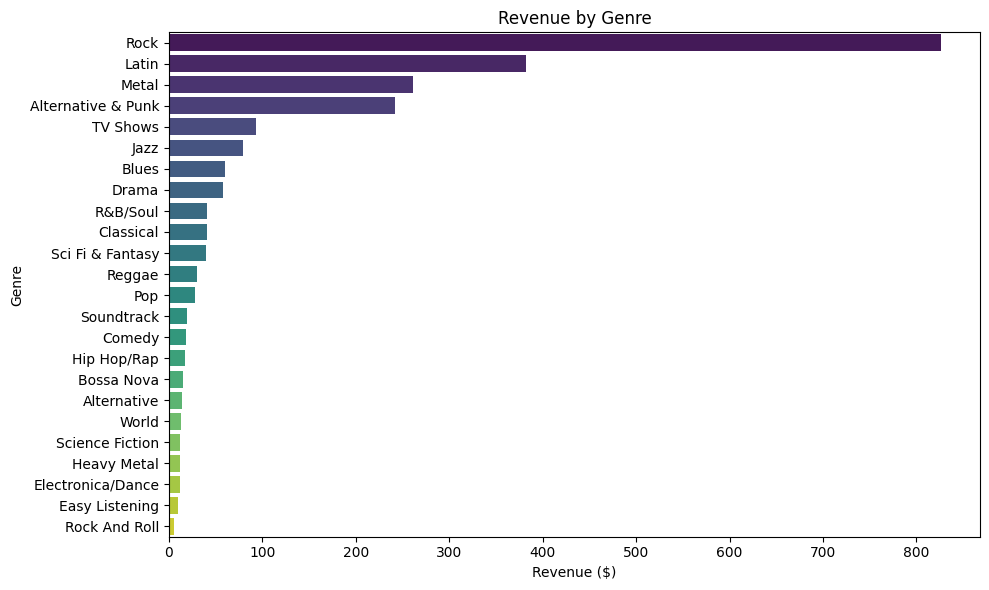

In [ ]:
# What is the revenue by genres?
query = """
SELECT g.Name AS Genre, SUM(il.UnitPrice * il.Quantity) AS Revenue
FROM invoice_items il
JOIN tracks t ON il.TrackId = t.TrackId
JOIN genres g ON t.GenreId = g.GenreId
GROUP BY g.GenreId
ORDER BY Revenue DESC;
"""
with db.connect("chinook.db") as db_con:
  genre = pd.read_sql_query( query , db_con)
genre

plt.figure(figsize=(10, 6))
sns.barplot(data=genre, x= "Revenue", y= "Genre", palette="viridis")
plt.title("Revenue by Genre")
plt.xlabel("Revenue ($)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


In [ ]:
# Show which genre each artist is in
query = '''
SELECT
  g.Name AS Genre,
  ar.Name AS ArtistName
FROM genres g
JOIN tracks t ON g.GenreId = t.GenreId
JOIN albums al ON t.AlbumId = al.AlbumId
JOIN artists ar ON al.ArtistId = ar.ArtistId
GROUP BY g.Name, ar.Name
ORDER BY g.Name, ar.Name;
'''
pd.set_option('display.max_rows', None)
with db.connect("chinook.db") as db_con:
  genres = pd.read_sql_query( query , db_con)
genres

,Genre,ArtistName
0,Alternative,Audioslave
1,Alternative,Cake
2,Alternative,Calexico
3,Alternative,Chris Cornell
4,Alternative,Temple of the Dog
5,Alternative & Punk,Audioslave
6,Alternative & Punk,Body Count
7,Alternative & Punk,Faith No More
8,Alternative & Punk,Foo Fighters
9,Alternative & Punk,Green Day


In [ ]:
# Searching which genre a specific artist is in
# Change WHERE ar.Name to desired artist name
query = '''
SELECT
  ar.Name AS ArtistName,
  g.Name AS GenreName
FROM artists ar
JOIN albums al ON ar.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
JOIN genres g ON t.GenreId = g.GenreId
WHERE ar.Name = 'U2'
GROUP BY ar.Name, g.Name
ORDER BY g.Name;
'''
with db.connect("chinook.db") as db_con:
  artists = pd.read_sql_query( query , db_con)
artists

,ArtistName,GenreName
0,U2,Pop
1,U2,Rock


In [ ]:
# Show all artists in a specific genre
query = '''
SELECT
  ar.Name AS ArtistName,
  g.Name AS GenreName
FROM artists ar
JOIN albums al ON ar.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
JOIN genres g ON t.GenreId = g.GenreId
WHERE g.Name = 'Pop'
GROUP BY ar.Name, g.Name
ORDER BY g.Name;
'''
with db.connect("chinook.db") as db_con:
  artists = pd.read_sql_query( query , db_con)
artists

,ArtistName,GenreName
0,Amy Winehouse,Pop
1,U2,Pop
2,Various Artists,Pop


In [ ]:
query = '''
SELECT
  al.Title AS AlbumTitle,
  g.Name AS GenreName
FROM albums al
JOIN tracks t ON al.AlbumId = t.AlbumId
JOIN genres g ON t.GenreId = g.GenreId
GROUP BY al.Title, g.Name
ORDER BY al.Title, g.Name;
'''
with db.connect("chinook.db") as db_con:
  albums = pd.read_sql_query( query , db_con)
albums

,AlbumTitle,GenreName
0,...And Justice For All,Metal
1,20th Century Masters - The Millennium Collecti...,Rock
2,"A Copland Celebration, Vol. I",Classical
3,A Matter of Life and Death,Rock
4,A Real Dead One,Metal
5,A Real Live One,Metal
6,A Soprano Inspired,Classical
7,A TempestadeTempestade Ou O Livro Dos Dias,Latin
8,A-Sides,Rock
9,Ace Of Spades,Metal


In [ ]:
# Show all albums and genres by U2
query = '''
SELECT
  ar.Name AS ArtistName,
  al.Title AS AlbumTitle,
  g.Name AS GenreName
FROM artists ar
JOIN albums al ON ar.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
JOIN genres g ON t.GenreId = g.GenreId
WHERE ar.Name = 'U2'
GROUP BY ar.Name, al.Title, g.Name
ORDER BY ar.Name, al.Title, g.Name;
'''
with db.connect("chinook.db") as db_con:
  albums = pd.read_sql_query( query , db_con)
albums

,ArtistName,AlbumTitle,GenreName
0,U2,Achtung Baby,Rock
1,U2,All That You Can't Leave Behind,Rock
2,U2,B-Sides 1980-1990,Rock
3,U2,How To Dismantle An Atomic Bomb,Rock
4,U2,Instant Karma: The Amnesty International Campa...,Pop
5,U2,Pop,Rock
6,U2,Rattle And Hum,Rock
7,U2,The Best Of 1980-1990,Rock
8,U2,War,Rock
9,U2,Zooropa,Rock


In [ ]:
# Show track names in each album by each artist
query = '''
SELECT
  ar.Name AS ArtistName,
  al.Title AS AlbumTitle,
  t.Name AS TrackName
FROM artists ar
JOIN albums al ON ar.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
ORDER BY ar.Name, al.Title, t.Name;
'''
with db.connect("chinook.db") as db_con:
  albums = pd.read_sql_query( query , db_con)
albums

,ArtistName,AlbumTitle,TrackName
0,AC/DC,For Those About To Rock We Salute You,Breaking The Rules
1,AC/DC,For Those About To Rock We Salute You,C.O.D.
2,AC/DC,For Those About To Rock We Salute You,Evil Walks
3,AC/DC,For Those About To Rock We Salute You,For Those About To Rock (We Salute You)
4,AC/DC,For Those About To Rock We Salute You,Inject The Venom
5,AC/DC,For Those About To Rock We Salute You,Let's Get It Up
6,AC/DC,For Those About To Rock We Salute You,Night Of The Long Knives
7,AC/DC,For Those About To Rock We Salute You,Put The Finger On You
8,AC/DC,For Those About To Rock We Salute You,Snowballed
9,AC/DC,For Those About To Rock We Salute You,Spellbound


## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data


In [ ]:
# Find top 3 loyal customers (most invoices + revenue)

query = '''
SELECT
c.CustomerId,
c.FirstName || ' ' || c.LastName AS CustomerName,
  COUNT(i.InvoiceId) AS InvoiceCount,
  ROUND(SUM(i.Total), 2) AS TotalSpent
FROM Customers c
JOIN Invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
ORDER BY InvoiceCount DESC, TotalSpent DESC
LIMIT 3;
'''

with db.connect("chinook.db") as db_con:
  loyal = pd.read_sql_query( query , db_con)
loyal

,CustomerId,CustomerName,InvoiceCount,TotalSpent
0,6,Helena Holý,7,49.62
1,26,Richard Cunningham,7,47.62
2,57,Luis Rojas,7,46.62


In [ ]:
# Show the songs Helena Holý bought.
query = """
SELECT
  c.FirstName || ' ' || c.LastName AS CustomerName,
  t.Name AS TrackName,
  ar.Name AS ArtistName
FROM Customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
JOIN tracks t ON il.TrackId = t.TrackId
JOIN albums al ON t.AlbumId = al.AlbumId
JOIN artists ar ON al.ArtistId = ar.ArtistId
WHERE c.FirstName = 'Helena' AND c.LastName = 'Holý'
ORDER BY CustomerName, TrackName, al.AlbumId, ar.ArtistId;
"""
with db.connect("chinook.db") as db_con:
  tracks = pd.read_sql_query( query , db_con)
tracks

,CustomerName,TrackName,ArtistName
0,Helena Holý,All I Want Is You,U2
1,Helena Holý,Black Capricorn Day,Jamiroquai
2,Helena Holý,Blissed & Gone,Smashing Pumpkins
3,Helena Holý,Can You See Me,Jimi Hendrix
4,Helena Holý,Carolina,Caetano Veloso
5,Helena Holý,Collaborators,Battlestar Galactica
6,Helena Holý,Deus Ex Machina,Lost
7,Helena Holý,Get What You Need,JET
8,Helena Holý,Heartland,U2
9,Helena Holý,How The West Was Won And Where It Got Us,R.E.M.


In [ ]:
# Show which albums were bought by Helena Holy
query = """
SELECT DISTINCT
  c.FirstName || ' ' || c.LastName AS CustomerName,
  al.Title AS AlbumTitle,
  ar.Name AS ArtistName
FROM Customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
JOIN tracks t ON il.TrackId = t.TrackId
JOIN albums al ON t.AlbumId = al.AlbumId
JOIN artists ar ON al.ArtistId = ar.ArtistId
WHERE c.FirstName = 'Helena' AND c.LastName = 'Holý'
ORDER BY AlbumTitle, ArtistName;
"""
with db.connect("chinook.db") as db_con:
  albums = pd.read_sql_query(query, db_con)

albums


,CustomerName,AlbumTitle,ArtistName
0,Helena Holý,Achtung Baby,U2
1,Helena Holý,Are You Experienced?,Jimi Hendrix
2,Helena Holý,"Battlestar Galactica, Season 3",Battlestar Galactica
3,Helena Holý,Emergency On Planet Earth,Jamiroquai
4,Helena Holý,Get Born,JET
5,Helena Holý,"Heroes, Season 1",Heroes
6,Helena Holý,Judas 0: B-Sides and Rarities,Smashing Pumpkins
7,Helena Holý,"Lost, Season 1",Lost
8,Helena Holý,"Lost, Season 2",Lost
9,Helena Holý,"Lost, Season 3",Lost


In [ ]:
# Show the songs Richard Cunningham bought.
query = """
SELECT
  c.FirstName || ' ' || c.LastName AS CustomerName,
  t.Name AS TrackName,
  ar.Name AS ArtistName
FROM Customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
JOIN tracks t ON il.TrackId = t.TrackId
JOIN albums al ON t.AlbumId = al.AlbumId
JOIN artists ar ON al.ArtistId = ar.ArtistId
WHERE c.FirstName = 'Richard' AND c.LastName = 'Cunningham'
ORDER BY CustomerName, TrackName, al.AlbumId, ar.ArtistId;
"""
with db.connect("chinook.db") as db_con:
  tracks = pd.read_sql_query( query , db_con)
tracks

,CustomerName,TrackName,ArtistName
0,Richard Cunningham,"""?""",Lost
1,Richard Cunningham,14 Years,Guns N' Roses
2,Richard Cunningham,Acrobat,U2
3,Richard Cunningham,American Idiot,Green Day
4,Richard Cunningham,Catch-22,Lost
5,Richard Cunningham,Company Man,Heroes
6,Richard Cunningham,Construção / Deus Lhe Pague,Chico Buarque
7,Richard Cunningham,"Crossroads, Pt. 1",Battlestar Galactica
8,Richard Cunningham,Dancing Barefoot,U2
9,Richard Cunningham,Drowning Man,U2


In [ ]:
# Show which albums were bought by Richard Cunningham
query = """
SELECT DISTINCT
  c.FirstName || ' ' || c.LastName AS CustomerName,
  al.Title AS AlbumTitle,
  ar.Name AS ArtistName
FROM Customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
JOIN tracks t ON il.TrackId = t.TrackId
JOIN albums al ON t.AlbumId = al.AlbumId
JOIN artists ar ON al.ArtistId = ar.ArtistId
WHERE c.FirstName = 'Richard' AND c.LastName = 'Cunningham'
ORDER BY AlbumTitle, ArtistName;
"""
with db.connect("chinook.db") as db_con:
  albums = pd.read_sql_query(query, db_con)

albums

,CustomerName,AlbumTitle,ArtistName
0,Richard Cunningham,A-Sides,Soundgarden
1,Richard Cunningham,Achtung Baby,U2
2,Richard Cunningham,Acústico MTV,Os Paralamas Do Sucesso
3,Richard Cunningham,All That You Can't Leave Behind,U2
4,Richard Cunningham,American Idiot,Green Day
5,Richard Cunningham,Appetite for Destruction,Guns N' Roses
6,Richard Cunningham,B-Sides 1980-1990,U2
7,Richard Cunningham,"Battlestar Galactica, Season 3",Battlestar Galactica
8,Richard Cunningham,"Heroes, Season 1",Heroes
9,Richard Cunningham,"Lost, Season 1",Lost


In [ ]:
# Show the songs Luis Rojas bought.
query = """
SELECT
  c.FirstName || ' ' || c.LastName AS CustomerName,
  t.Name AS TrackName,
  ar.Name AS ArtistName
FROM Customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
JOIN tracks t ON il.TrackId = t.TrackId
JOIN albums al ON t.AlbumId = al.AlbumId
JOIN artists ar ON al.ArtistId = ar.ArtistId
WHERE c.FirstName = 'Luis' AND c.LastName = 'Rojas'
ORDER BY CustomerName, TrackName, al.AlbumId, ar.ArtistId;
"""
with db.connect("chinook.db") as db_con:
  tracks = pd.read_sql_query( query , db_con)
tracks

,CustomerName,TrackName,ArtistName
0,Luis Rojas,A Novidade (Live),Gilberto Gil
1,Luis Rojas,Aprendendo A Jogar,Elis Regina
2,Luis Rojas,Aquele Abraço,Eric Clapton
3,Luis Rojas,Badge,Eric Clapton
4,Luis Rojas,Better Halves,Heroes
5,Luis Rojas,Black Dog,Led Zeppelin
6,Luis Rojas,"Crossroads, Pt. 2",Battlestar Galactica
7,Luis Rojas,Fly Me To The Moon,Frank Sinatra
8,Luis Rojas,Forty Days Instrumental,Funk Como Le Gusta
9,Luis Rojas,Funk Hum,Funk Como Le Gusta


In [ ]:
# Show which albums were bought by Luis Rojas
query = """
SELECT DISTINCT
  c.FirstName || ' ' || c.LastName AS CustomerName,
  al.Title AS AlbumTitle,
  ar.Name AS ArtistName
FROM Customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
JOIN tracks t ON il.TrackId = t.TrackId
JOIN albums al ON t.AlbumId = al.AlbumId
JOIN artists ar ON al.ArtistId = ar.ArtistId
WHERE c.FirstName = 'Luis' AND c.LastName = 'Rojas'
ORDER BY AlbumTitle, ArtistName;
"""
with db.connect("chinook.db") as db_con:
  albums = pd.read_sql_query(query, db_con)

albums

,CustomerName,AlbumTitle,ArtistName
0,Luis Rojas,American Idiot,Green Day
1,Luis Rojas,As Canções de Eu Tu Eles,Gilberto Gil
2,Luis Rojas,"Battlestar Galactica, Season 3",Battlestar Galactica
3,Luis Rojas,Chemical Wedding,Bruce Dickinson
4,Luis Rojas,"Chronicle, Vol. 2",Creedence Clearwater Revival
5,Luis Rojas,Coda,Led Zeppelin
6,Luis Rojas,Elis Regina-Minha História,Elis Regina
7,Luis Rojas,Faceless,Godsmack
8,Luis Rojas,"Heroes, Season 1",Heroes
9,Luis Rojas,Houses Of The Holy,Led Zeppelin


In [ ]:
# Top 10 most purchased tracks
query = '''
SELECT
  t.Name AS TrackName,
  ar.Name AS ArtistName,
  COUNT(il.TrackId) AS TimesPurchased
FROM invoice_items il
JOIN tracks t ON il.TrackId = t.TrackId
JOIN albums al ON t.AlbumId = al.AlbumId
JOIN artists ar ON al.ArtistId = ar.ArtistId
GROUP BY il.TrackId
ORDER BY TimesPurchased DESC
LIMIT 10;
'''
with db.connect("chinook.db") as db_con:
  tracks = pd.read_sql_query( query , db_con)
tracks

,TrackName,ArtistName,TimesPurchased
0,Balls to the Wall,Accept,2
1,Inject The Venom,AC/DC,2
2,Snowballed,AC/DC,2
3,Overdose,AC/DC,2
4,Deuces Are Wild,Aerosmith,2
5,Not The Doctor,Alanis Morissette,2
6,Por Causa De Você,Antônio Carlos Jobim,2
7,Welcome Home (Sanitarium),Apocalyptica,2
8,Snowblind,Black Sabbath,2
9,Cornucopia,Black Sabbath,2


/tmp/ipython-input-53-3428904014.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


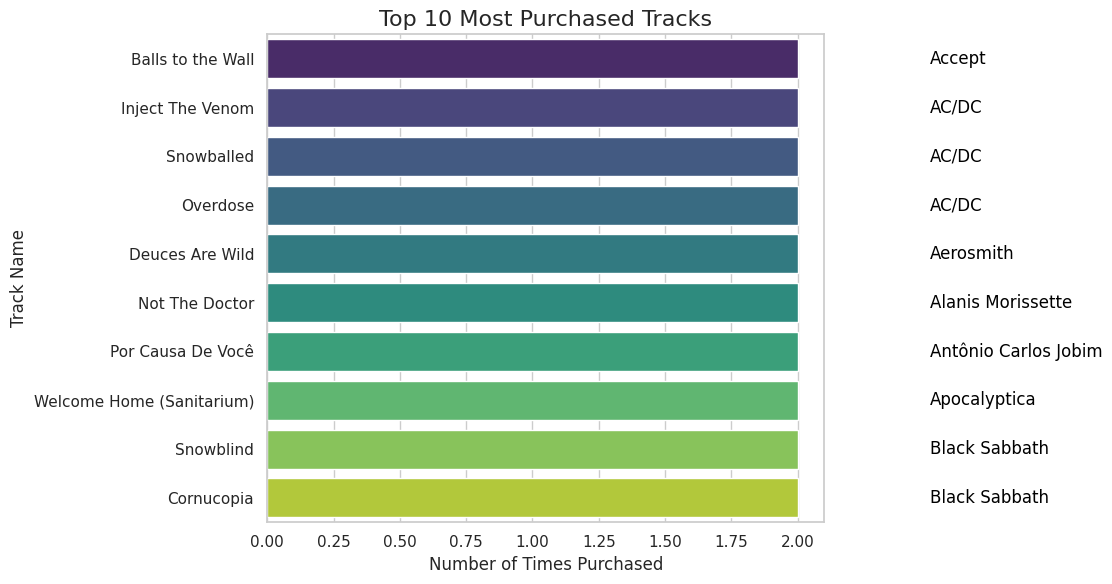

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=tracks,
    x='TimesPurchased',
    y='TrackName',
    palette='viridis',
    orient='h'
)

# Add labels and title
plt.title('Top 10 Most Purchased Tracks', fontsize=16)
plt.xlabel('Number of Times Purchased')
plt.ylabel('Track Name')

# Show artist name next to track for clarity
for index, row in tracks.iterrows():
    barplot.text(row.TimesPurchased + 0.5, index, row.ArtistName, color='black', va="center")

plt.tight_layout()
plt.show()


In [ ]:
# Albums with most tracks purchased
query = '''
SELECT
  al.Title AS AlbumTitle,
  ar.Name AS ArtistName,
  COUNT(il.TrackId) AS TotalPurchases
FROM invoice_items il
JOIN tracks t ON il.TrackId = t.TrackId
JOIN albums al ON t.AlbumId = al.AlbumId
JOIN artists ar ON al.ArtistId = ar.ArtistId
GROUP BY al.AlbumId
ORDER BY TotalPurchases DESC
LIMIT 5;
'''
with db.connect("chinook.db") as db_con:
  album = pd.read_sql_query( query , db_con)
album

,AlbumTitle,ArtistName,TotalPurchases
0,Minha Historia,Chico Buarque,27
1,Greatest Hits,Lenny Kravitz,26
2,Unplugged,Eric Clapton,25
3,Acústico,Titãs,22
4,Greatest Kiss,Kiss,20


/tmp/ipython-input-55-3349123706.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


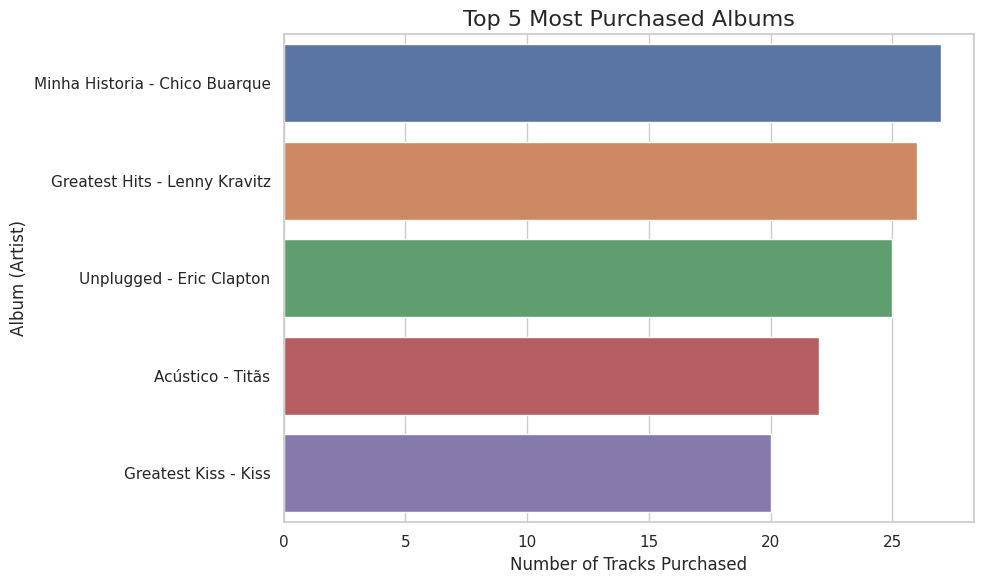

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Create a combined label for albums (Album - Artist)
album['AlbumLabel'] = album['AlbumTitle'] + " - " + album['ArtistName']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=album,
    x='TotalPurchases',
    y='AlbumLabel',
    palette='deep'
)

# Title and labels
plt.title('Top 5 Most Purchased Albums', fontsize=16)
plt.xlabel('Number of Tracks Purchased')
plt.ylabel('Album (Artist)')

# Improve layout
plt.tight_layout()
plt.show()
